### Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Modelling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Read Data

The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>

In [2]:
data = pd.read_excel("loan data/Copy of loan.xlsx")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
# Drop loan ID
data.drop(columns=["Loan_ID"], inplace=True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

With a few missing values in some columns, we'd fill them up rather than dropping the rows so we don't loose data.

### Exploratory Data Analysis

In order to best perform EDA we would ask some questions about our data and try to answer them.

<b>Find answers and visualize them by making inferences</b>

1. Q1.How is the gender distribution?
2. Q2.How is the marriage distribution?
3. Q3.How is the distribution of marriage by gender?
4. Q4.How is the education distribution?
5. Q5.How is the distribution of education by gender,marriage?
6. Q6.How is the self employed distribution?
7. Q7.How is the distribution of self employed by gender?
8. Q8.How is the  applicant income distribution? 
9. Q9.How much is the average,min,max applicant income?
10. Q10.How much is the average,min,max applicant income by self employed?
11. Q11.How is the location of the houses? 
12. Q12.How much is the income of the applicants distributed according to the location of the houses?
13. Q13.How much is the Loan Amount of the applicants distributed according to the location of the houses?
14. Q14.How is the Credit History Distribution ?
15. Q15.How does the credit history relate to applicant income,loan amount,loan amount term?(min,max mean)

##### 1. How is the gender distributed?

In [9]:
df_gender=data['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})

fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'], pull=[0,0.2],hole=0.4)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Gender Count",title_x=0.5)
fig.show()

In [10]:
df_gender=data['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})

fig = go.Figure(go.Bar(
    x=df_gender['Gender'],y=df_gender['count'],
    marker={'color': df_gender['count'], 
    'colorscale': 'Viridis'},  
    text=df_gender['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Gender Distribution',xaxis_title="Gender",yaxis_title="Count ",title_x=0.5)
fig.show()

##### 2. How is the marriage distribution?

In [11]:
df_Married=data['Married'].value_counts().to_frame().reset_index().rename(columns={'index':'Married','Married':'count'})

fig = go.Figure([go.Pie(labels=df_Married['Married'], values=df_Married['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Married Count",title_x=0.5)
fig.show()

##### 3. How is the distribution of marriage by gender?

In [12]:
df_M_and_G=data.groupby(by =['Gender','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'Count'})
df_M_and_G

fig = px.bar(df_M_and_G, x="Married", y="Count",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Married Count With Gender',title_x=0.5,
                 )
fig.show()

##### 4. How is the education distribution?

In [13]:
df_Education=data['Education'].value_counts().to_frame().reset_index().rename(columns={'index':'Education','Education':'count'})

fig = go.Figure([go.Pie(labels=df_Education['Education'], values=df_Education['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Education Count",title_x=0.5)
fig.show()

##### 5. How is the distribution of education by gender,marriage?

In [14]:
df_M_and_G_and_E=data.groupby(by =['Gender','Education','Married'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Married':'Married','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Gender", y="count", color="Married", barmode="group",
             facet_col="Education"
             )
fig.update_layout(title_text='Education Count With Gender,Married',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

##### 6. How is the self employed distribution?

In [15]:
df_Self_Employed=data['Self_Employed'].value_counts().to_frame().reset_index().rename(columns={'index':'Self_Employed','Self_Employed':'count'})

fig = go.Figure([go.Pie(labels=df_Self_Employed['Self_Employed'], values=df_Self_Employed['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Self Employed Count",title_x=0.5)
fig.show()

##### 7. How is the distribution of self employed by gender?

In [16]:
df_M_and_G_and_E=data.groupby(by =['Gender','Self_Employed'])['Dependents'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Self_Employed':'Self_Employed','Dependents':'count'})

fig = px.bar(df_M_and_G_and_E, x="Gender", y="count", color="Self_Employed", barmode="group",
             
             )
fig.update_layout(title_text='Self Employed Count With Gender',title_x=0.5,
                  hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell",
                                
     )
  )
fig.show()

##### 8. How is the  applicant income distribution? 

In [17]:
fig = go.Figure(data=[go.Histogram(x=data['ApplicantIncome'],  # To get Horizontal plot ,change axis - 
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, #start range of bin
                      end=25000,  #end range of bin
                      size=1000   #size of bin
                      ))])
fig.update_layout(title="Distribution Of Applicant Income",xaxis_title="Applicant Income",yaxis_title="Counts",title_x=0.5)
fig.show()

##### 9 and 10. How much is the average,min,max applicant income? and How much is the average,min,max applicant income by self employed?

In [18]:
SE_Y_income=data[data["Self_Employed"]=="Yes"]
SE_N_income=data[data["Self_Employed"]=="No"]


minY_income=SE_Y_income.ApplicantIncome.min()

maxY_income=SE_Y_income.ApplicantIncome.max()

meanY_income=SE_Y_income.ApplicantIncome.mean()

minN_income=SE_N_income.ApplicantIncome.min()

maxN_income=SE_N_income.ApplicantIncome.max()

meanN_income=SE_N_income.ApplicantIncome.mean()

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+gauge", value =  minY_income,
    domain = {'x': [0.25, 1], 'y': [0.05, 0.15]},
    title = {'text': "Self Employed Min Income ",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None, 1500]},
        'bar': {'color': "blue"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = maxY_income,
    domain = {'x': [0.25, 1], 'y': [0.22, 0.32]},
    title = {'text': "Self Employed Max Income",'font':{'color': 'black','size':12}},
    number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,42500]},
        'bar': {'color': "cyan"}}))

fig.add_trace(go.Indicator(
    mode = "number+gauge", value = meanY_income,
    domain = {'x': [0.25, 1], 'y': [0.39, 0.49]},
    title = {'text' :"Self Employed Mean Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,8000]},
        'bar': {'color': "darkblue"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = minN_income,
    domain = {'x': [0.25, 1], 'y': [0.55, 0.65]},
    title = {'text' :"Not Self Employed Min Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,200]},
        'bar': {'color': "darkcyan"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = maxN_income,
    domain = {'x': [0.25, 1], 'y': [0.72,0.82]},
    title = {'text' :"Not Self Employed Max Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,90000]},
        'bar': {'color': "red"}}
))
fig.add_trace(go.Indicator(
    mode = "number+gauge", value = meanN_income,
    domain = {'x': [0.25, 1], 'y': [0.88,0.98]},
    title = {'text' :"Not Self Employed Mean Income",'font':{'color': 'black','size':12}},
     number={'font':{'color': 'black'}},
    gauge = {
        'shape': "bullet",
        'axis': {'range': [None,6000]},
        'bar': {'color': "red"}}
))
fig.update_layout(title=" Self Employed And Not Self Employed Applicant Income Statistics ",title_x=0.5)
fig.show()

##### 11. How is the location of the houses?

In [19]:
df_Property_Area=data['Property_Area'].value_counts().to_frame().reset_index().rename(columns={'index':'Property_Area','Property_Area':'count'})

fig = go.Figure(data=[go.Scatter(
    x=df_Property_Area['Property_Area'], y=df_Property_Area['count'],
    mode='markers',
    marker=dict(
        color=df_Property_Area['count'],
        size=df_Property_Area['count']*0.3, # Multiplying by 0.3 to reduce size and stay uniform accross all points
        showscale=True
    ))])

fig.update_layout(title='Property Area',xaxis_title="Property Area ",yaxis_title="Number Of Property ",title_x=0.5)
fig.show()

##### 12. How much is the income of the applicants distributed according to the location of the houses?

In [20]:
df_PA_mean=data.groupby(by =['Property_Area'])['ApplicantIncome'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','ApplicantIncome':'mean'})
df_PA_min=data.groupby(by =['Property_Area'])['ApplicantIncome'].min().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area1','ApplicantIncome':'min'})
df_PA_max=data.groupby(by =['Property_Area'])['ApplicantIncome'].max().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area2','ApplicantIncome':'max'})
result = pd.concat([df_PA_mean, df_PA_min,df_PA_max], axis=1)
result.drop(['Property_Area1','Property_Area2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Applicant Income",
                                   "Min Applicant Income",
                                   "Max  Applicant Income"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'fall'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'fall'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'fall'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Property Area With Applicant Income",title_x=0.5)
fig.show()

##### 13. How much is the Loan Amount of the applicants distributed according to the location of the houses?

In [21]:
df_PA_mean=data.groupby(by =['Property_Area'])['LoanAmount'].mean().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area','LoanAmount':'mean'})
df_PA_min=data.groupby(by =['Property_Area'])['LoanAmount'].min().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area1','LoanAmount':'min'})
df_PA_max=data.groupby(by =['Property_Area'])['LoanAmount'].max().to_frame().reset_index().rename(columns={'Property_Area':'Property_Area2','LoanAmount':'max'})
result = pd.concat([df_PA_mean, df_PA_min,df_PA_max], axis=1)
result.drop(['Property_Area1','Property_Area2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount",
                                   "Min Loan Amount",
                                   "Max  Loan Amount"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'curl'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'curl'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Property_Area'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'curl'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Property Area With Loan Amount",title_x=0.5)
fig.show()

In [22]:
fig = px.scatter(data, x='ApplicantIncome', y='LoanAmount',color="Property_Area")
fig.update_layout(title='Applicant Income Vs Loan Amount With Property Area ',xaxis_title="Applicant Income",yaxis_title="Loan Amount ",title_x=0.5)
fig.show()

##### 14. How is the Credit History Distribution ?

In [23]:
df_C_H=data['Credit_History'].value_counts().to_frame().reset_index().rename(columns={'index':'Credit_History','Credit_History':'count'})


fig = go.Figure([go.Pie(labels=df_C_H['Credit_History'], values=df_C_H['count'],pull=[0,0.3])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Credit History Count ",title_x=0.5)
fig.show()

##### 15. How does the credit history relate to applicant income,loan amount,loan amount term?(min,max mean)

In [24]:
df_CH_mean=data.groupby(by =['Credit_History'])['Loan_Amount_Term'].mean().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History','Loan_Amount_Term':'mean'})
df_CH_min=data.groupby(by =['Credit_History'])['Loan_Amount_Term'].min().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History1','Loan_Amount_Term':'min'})
df_CH_max=data.groupby(by =['Credit_History'])['Loan_Amount_Term'].max().to_frame().reset_index().rename(columns={'Credit_History':'Credit_History2','Loan_Amount_Term':'max'})
result = pd.concat([df_CH_mean, df_CH_min,df_CH_max], axis=1)
result.drop(['Credit_History1','Credit_History2'],inplace=True,axis=1)


fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Mean Loan Amount Term",
                                   "Min Loan Amount Term",
                                   "Max  Loan Amount Term"))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['mean'],
    marker={'color': result['mean'], 
    'colorscale': 'balance'},  
    text=result['mean'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['min'],
    marker={'color': result['min'], 
    'colorscale': 'balance'},  
    text=result['min'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Credit_History'],y=result['max'],
    marker={'color': result['max'], 
    'colorscale': 'balance'},  
    text=result['max'],
    textposition = "inside"),
    row=3, col=1           
)
fig.update_layout(title = "Credit History With Loan Amount Term",title_x=0.5)
fig.show()

### Data Preprocessing 

##### Fill Missing values

In [25]:
columns_to_mode_fill = ["Gender","Married","Dependents","Self_Employed","Self_Employed","Loan_Amount_Term","Credit_History"]
columns_to_mean_fill = ["LoanAmount"]

def fill_na_mode_mean(df, columns_to_mode_fill, columns_to_mean_fill):
    for column in columns_to_mode_fill:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

    for column in columns_to_mean_fill:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    return df

data = fill_na_mode_mean(data.copy(), columns_to_mode_fill, columns_to_mean_fill)

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Label Encoder

In [26]:
# Label encode our categorical columns

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
label_mappings = {}

# Label encode the categorical columns and store the mappings
for column in categorical_columns:
    data[column].fillna(-1, inplace=True)
    data[column], label_mapping = pd.factorize(data[column])
    label_mappings[column] = label_mapping

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0
610,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,0
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,0


In [27]:
label_mappings

{'Gender': Index(['Male', 'Female'], dtype='object'),
 'Married': Index(['No', 'Yes'], dtype='object'),
 'Dependents': Index([0, 1, 2, '3+'], dtype='object'),
 'Education': Index(['Graduate', 'Not Graduate'], dtype='object'),
 'Self_Employed': Index(['No', 'Yes'], dtype='object'),
 'Property_Area': Index(['Urban', 'Rural', 'Semiurban'], dtype='object'),
 'Loan_Status': Index(['Y', 'N'], dtype='object')}

##### Remove Outliers

In [28]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [29]:
data_out = data.copy()
clf.fit_predict(data_out)
df_scores = clf.negative_outlier_factor_

In [30]:
np.sort(df_scores)[0:70]

array([-10.19900276,  -9.88883473,  -8.0189209 ,  -7.23889155,
        -5.76088368,  -4.67053764,  -4.65696983,  -4.38093665,
        -4.3779475 ,  -4.11507407,  -3.57828412,  -2.8269383 ,
        -2.8016716 ,  -2.49504421,  -2.29839615,  -2.22298053,
        -2.08269213,  -2.07671893,  -2.06656969,  -2.04781535,
        -2.04574293,  -2.04400705,  -2.01171049,  -1.97307739,
        -1.97273214,  -1.95496455,  -1.92868421,  -1.92223727,
        -1.89340547,  -1.88159207,  -1.86544608,  -1.86493429,
        -1.85352326,  -1.85235119,  -1.78697896,  -1.7749279 ,
        -1.77054325,  -1.77023172,  -1.73842973,  -1.71720859,
        -1.69129094,  -1.63898702,  -1.63303331,  -1.61937439,
        -1.60534646,  -1.59386422,  -1.58375227,  -1.58226138,
        -1.58225508,  -1.55041844,  -1.54015708,  -1.52083415,
        -1.51866816,  -1.50167522,  -1.49472911,  -1.49015902,
        -1.4890324 ,  -1.48851298,  -1.4878109 ,  -1.47664161,
        -1.46782243,  -1.4657599 ,  -1.43054113,  -1.42

In [31]:
threshold_value = np.sort(df_scores)[23]
threshold_value

-1.9730773852121721

Every data point greater than our threshold value is considered an outlier

In [32]:
Outlier_df= data_out[df_scores < threshold_value]
indexs=Outlier_df.index

In [33]:
# Kick Outliers
for i in indexs:
    data.drop(i, axis = 0,inplace = True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0
610,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,0
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,0


In [34]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0
610,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,0
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             591 non-null    int64  
 1   Married            591 non-null    int64  
 2   Dependents         591 non-null    int64  
 3   Education          591 non-null    int64  
 4   Self_Employed      591 non-null    int64  
 5   ApplicantIncome    591 non-null    int64  
 6   CoapplicantIncome  591 non-null    float64
 7   LoanAmount         591 non-null    float64
 8   Loan_Amount_Term   591 non-null    float64
 9   Credit_History     591 non-null    float64
 10  Property_Area      591 non-null    int64  
 11  Loan_Status        591 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 60.0 KB


##### Skewed Distribution Treatment

In previous section, we saw that distribution for **ApplicantIncome, CoapplicantIncome, and LoanAmount are positively skewed**. <br>

We will use **square root transformation** to normalized the distribution.

In [36]:
# Square Root Transformation

data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

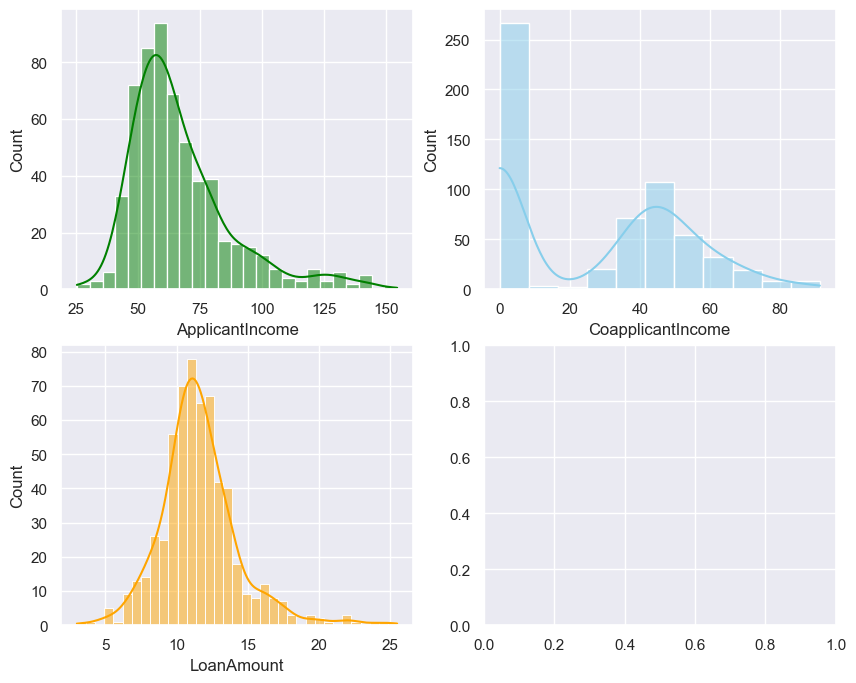

In [37]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

Now the distribution after using log transformation are much better compared to original distribution.

##### Data Splitting

In [38]:
y = data['Loan_Status']
X = data.drop(['Loan_Status'],axis='columns')
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,76.478755,0.000000,12.100089,360.0,1.0,0
1,0,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,1
2,0,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,0
3,0,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,0
4,0,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,1
610,0,1,3,0,0,64.078077,0.000000,6.324555,180.0,1.0,1
611,0,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,0
612,0,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,0


In [39]:
# Data Normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [45]:
# Diving the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Random Forest Classifier

In [46]:
# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
print(accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

0.8067226890756303
[[79  2]
 [21 17]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        81
           1       0.89      0.45      0.60        38

    accuracy                           0.81       119
   macro avg       0.84      0.71      0.73       119
weighted avg       0.82      0.81      0.78       119



The RandomForestClassifier performs relatively well with an accuracy score of 79.4%! Let's try the XGBoostClassifier and see if it can outperform the RandomForest.

### XGBoost Classifier

In [47]:
# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
print(accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, rf_preds))

0.7815126050420168
[[75  6]
 [20 18]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        81
           1       0.89      0.45      0.60        38

    accuracy                           0.81       119
   macro avg       0.84      0.71      0.73       119
weighted avg       0.82      0.81      0.78       119



### Handle Class Imbalance

In [48]:
#%pip install imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
print("Before Oversampling - ")
print("0: ", len(y[y==0]))
print("1: ", len(y[y==1]))

Before Oversampling - 
0:  410
1:  181


In [51]:
smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [52]:
print("After Oversampling - ")
print("0: ", len(y[y==0]))
print("1: ", len(y[y==1]))

After Oversampling - 
0:  410
1:  410


In [53]:
# Diving the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Random Forest Classifier Balanced

In [54]:
# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
print(accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

0.8292682926829268
[[76 10]
 [18 60]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        86
           1       0.86      0.77      0.81        78

    accuracy                           0.83       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.83      0.83       164



### XGBoost Classifier Balanced

In [55]:
# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
print(accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, rf_preds))

0.8414634146341463
[[75 11]
 [15 63]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        86
           1       0.86      0.77      0.81        78

    accuracy                           0.83       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.83      0.83      0.83       164



In [4]:
# Save and export best model
import joblib
import pandas as pd

# save model and scaler
#joblib.dump(rf, "model.joblib")
#joblib.dump(scaler, 'scaler.joblib')

In [6]:
# Load model and 
new_rf = joblib.load("model.joblib")
new_scaler = joblib.load("scaler.joblib")
# Prediction

column = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]
values = [[1, 0, 1, 1, 1, 17263, 0.0, 205.5, 360.0, 1.0, 2]]
df = pd.DataFrame(data=values, columns=column)

df


' ===== Preprocessing =====\n \ndf.ApplicantIncome = np.sqrt(data.ApplicantIncome)\ndf.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)\ndf.LoanAmount = np.sqrt(data.LoanAmount)\n\nX_train_normalized = new_scaler.fit_transform(df)\n\nX_train_normalized\n\nnew_rf = new_rf.predict(X_train_normalized)\nnew_rf'

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
